# **Data Cleaning**

## Objectives

* Clean the data by handling missing values and ensuring correct data types.
* Convert specific columns to `float` for consistency.
* Save the cleaned dataset for further analysis and modeling.

## Inputs

* outputs/datasets/collection/HousePricesRecords.csv`: The raw collected data from the Data Collection step

## Outputs

* outputs/datasets/cleaned/HousePricesCleaned.csv`: The cleaned data, ready for feature engineering and analysis

---

# Change working directory

* The notebooks are stored in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues'

## Load data

Load the data to check data types

In [1]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/HousePricesRecords.csv")
df.head


<bound method NDFrame.head of       1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0        856.0     854.0           3.0           No       706.0          GLQ   
1       1262.0       0.0           3.0           Gd       978.0          ALQ   
2        920.0     866.0           3.0           Mn       486.0          GLQ   
3        961.0       NaN           NaN           No       216.0          ALQ   
4       1145.0       NaN           4.0           Av       655.0          GLQ   
...        ...       ...           ...          ...         ...          ...   
1455     953.0     694.0           3.0           No         0.0          Unf   
1456    2073.0       0.0           NaN           No       790.0          ALQ   
1457    1188.0    1152.0           4.0           No       275.0          GLQ   
1458    1078.0       0.0           2.0           Mn        49.0          NaN   
1459    1256.0       0.0           3.0           No       830.0          BLQ   

      Bsm

Remove duplicates

In [2]:
df.drop_duplicates(inplace=True)
print(f"Duplicates after cleaning: {df.duplicated().sum()}")
print(f"Shape of data after removing duplicates: {df.shape}")

Duplicates after cleaning: 0
Shape of data after removing duplicates: (1460, 24)


Handle missing data

In [3]:
# Fill in missing numerical columns with the median
numerical_features = df.select_dtypes(include=['number']).columns
df[numerical_features] = df[numerical_features].apply(lambda x: x.fillna(x.median()))

# Fill in missing categorical columns with the most common category
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

# Check if there are any missing values left
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
1stFlrSF         0
2ndFlrSF         0
BedroomAbvGr     0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtUnfSF        0
EnclosedPorch    0
GarageArea       0
GarageFinish     0
GarageYrBlt      0
GrLivArea        0
KitchenQual      0
LotArea          0
LotFrontage      0
MasVnrArea       0
OpenPorchSF      0
OverallCond      0
OverallQual      0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
SalePrice        0
dtype: int64


Convert object to category 

In [4]:
df['BsmtExposure'] = df['BsmtExposure'].astype('category')
df['BsmtFinType1'] = df['BsmtFinType1'].astype('category')
df['GarageFinish'] = df['GarageFinish'].astype('category')
df['KitchenQual'] = df['KitchenQual'].astype('category')


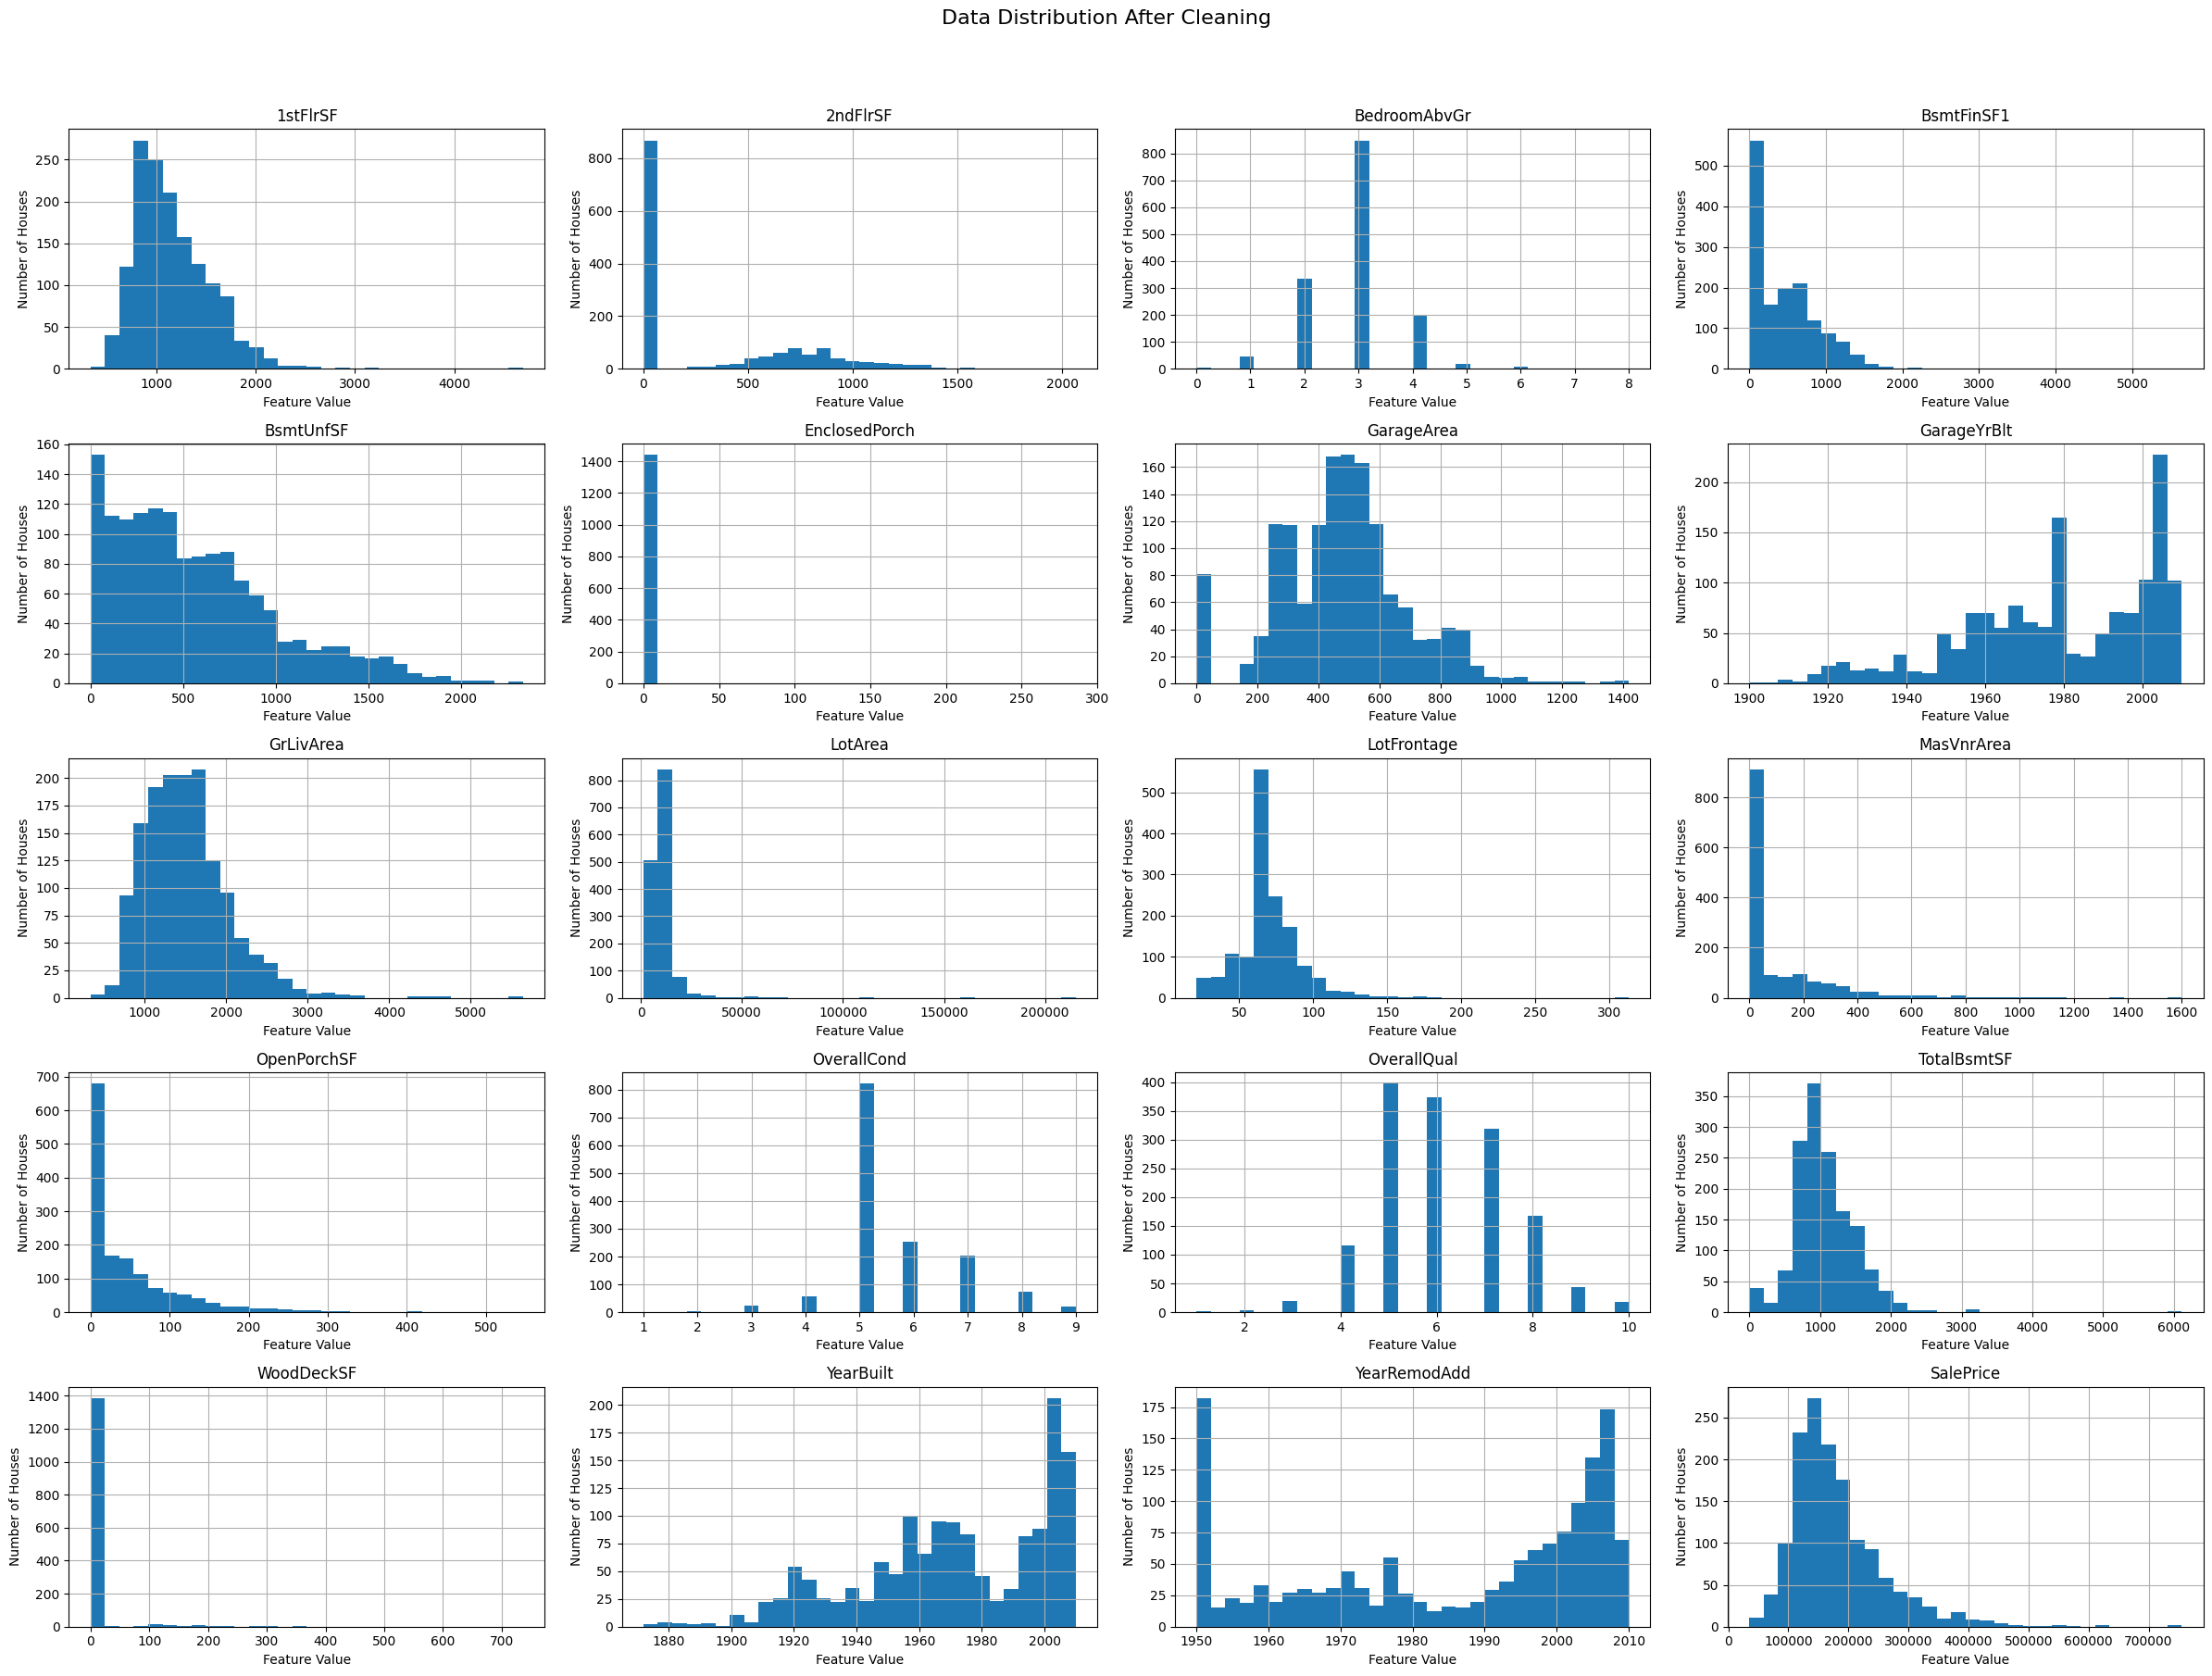

In [6]:
import matplotlib.pyplot as plt


df.hist(bins=30, figsize=(24, 19))
plt.suptitle("Data Distribution After Cleaning", fontsize=16)

for ax in plt.gcf().axes:
    ax.set_xlabel("Feature Value")
    ax.set_ylabel("Number of Houses")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Check data types

In [7]:
df.dtypes

1stFlrSF          float64
2ndFlrSF          float64
BedroomAbvGr      float64
BsmtExposure     category
BsmtFinSF1        float64
BsmtFinType1     category
BsmtUnfSF         float64
EnclosedPorch     float64
GarageArea        float64
GarageFinish     category
GarageYrBlt       float64
GrLivArea         float64
KitchenQual      category
LotArea           float64
LotFrontage       float64
MasVnrArea        float64
OpenPorchSF       float64
OverallCond         int64
OverallQual         int64
TotalBsmtSF       float64
WoodDeckSF        float64
YearBuilt           int64
YearRemodAdd        int64
SalePrice         float64
dtype: object

___

## Push files to repo

In [8]:
df.to_csv("outputs/datasets/collection/HousePricesCleaned.csv", index=False)
print("Exported the transformed dataset successfully!")

Exported the transformed dataset successfully!
